In [1]:
%matplotlib widget

In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import seaborn as sns
from IPython import display
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy import stats

sns.set_style('darkgrid')

In [3]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
sns.set_style('darkgrid')
matplotlib.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.size': 8, 
    'axes.titlesize': 8,
    'legend.fontsize': 6, 
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'axes.titlepad': 8,
    'xtick.major.pad': 0,
    'ytick.major.pad': 0,
    'axes.labelpad': 2,
})
tight_layout_args = dict(pad=0, w_pad=0, h_pad=0)

In [4]:
invgammap = lambda sigma0_2, L: stats.invgamma(a = L/2, loc = 0, scale = sigma0_2*L/2)

$\theta = \{\nu, \sigma_m^2, \sigma_\alpha, \beta, \lambda\}$

$\nu \sim \Gamma(\zeta_{\nu}, \xi_{\nu})$

$\sigma_m^2 \sim \Gamma(\zeta_{\sigma_m^2}, \xi_{\sigma_m^2})$

```python
kernel:torch.nn.Module = PolynomialKernel(variance_prior=0.5, degree=2),
Klist += [ DiscreteDiffusionKernel(length_scales=[1.]*nx, product_space=product_space) ]

sigma2m_prior:float = 0.15,
sigma2m_hyperprior:torch.distributions.Distribution = Gamma(2.,15.),
L_prior:float = 2.5,
L_hyperprior:torch.distributions.Distribution = Gamma(2., 0.5)
```

$\lambda \sim \text{Beta} (\alpha_\lambda,\beta_\lambda)$
```python
self.lambd = HyperParameter(
    torch.tensor(lambd), constraint=Interval(0.,1.), requires_grad=True,
    alpha = Parameter(torch.tensor(1.5), requires_grad=False),
    beta  = Parameter(torch.tensor(1.5), requires_grad=False),
    hyperprior = lambda self: Beta(self.alpha, self.beta)
)
```



sigma2m


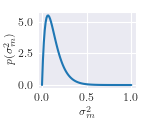

L


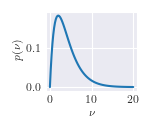

lambda


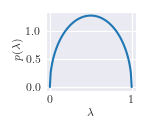

In [5]:
sigma2m_dist = stats.gamma(2.0, 0, 1/15.)
L_dist = stats.gamma(2.0, 0., 1/0.5)
lambda_dist = stats.beta(1.5, 1.5)

print(f'sigma2m')
fig, axs = plt.subplots(1,1,figsize=(1.5,1.3))
s = np.linspace(0, 1.0, 100)
axs.plot(s, sigma2m_dist.pdf(s), label='Gamma(2,15)')
axs.set_xlabel(r'$\sigma_m^2$')
axs.set_ylabel(r'$p(\sigma_m^2)$')
axs.set_xticks([0, 0.5, 1])
# axs.set_xlim([0,1])
# axs.set_ylim(bottom=0)
plt.tight_layout()
plt.savefig('images/sigma2m_dist.pdf')
plt.show()

print(f'L')
fig, axs = plt.subplots(1,1,figsize=(1.5,1.3))
s = np.linspace(0, 20.0, 100)
axs.plot(s, L_dist.pdf(s), label='Gamma(2,0.5)')
axs.set_xlabel(r'$\nu$')
axs.set_ylabel(r'$p(\nu)$')
axs.set_xticks([0, 10, 20])
# axs.set_xlim([0,20])
# axs.set_ylim(bottom=0)
plt.tight_layout()
plt.savefig('images/L_dist.pdf')
plt.show()


print(f'lambda')
fig, axs = plt.subplots(1,1,figsize=(1.5,1.3))
s = np.linspace(0, 1.0, 100)
axs.plot(s, lambda_dist.pdf(s), label='Beta(1.5,1.5)')
axs.set_xlabel(r'$\lambda$')
axs.set_ylabel(r'$p(\lambda)$')
# axs.set_xlim([0,1])
# axs.set_ylim(bottom=0)
plt.tight_layout()
plt.savefig('images/lambda_dist.pdf')
plt.show()


Simulated annealing scheduler:
```python
evalBudget = 100,
T_point	= (0.5, 0.005),
```


Initial T: 0.5
Decay factor: 0.9908319448927676
T[end] = 0.0050000000000000695


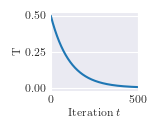

In [6]:
maxiter = 500
point = (0.5, 0.005)

f = (point[1]/point[0]) ** (1/(maxiter))

print(f'Initial T: {point[0]}')
print(f'Decay factor: {f}')

print(f'T[end] = {point[0]*f**maxiter}')

plt.figure(figsize=(1.5,1.3))
it = np.arange(0,maxiter+1)
fac = [point[0]*f**i for i in it]
plt.plot( it, fac )
plt.grid(True)
plt.xlabel(r'Iteration $t$')
plt.ylabel('T')
# plt.xticks([0, 250, maxiter])
plt.yticks([0, 0.25, 0.5])
plt.xlim([-2,maxiter])
plt.tight_layout()
plt.savefig('images/T_decay.pdf')
plt.show()


CBOSS:
```python
beta_feas_fac:float = 20.,
beta_succ_fac:float = 5.,
```

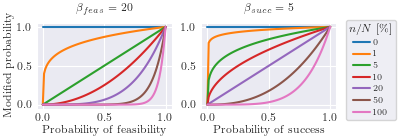

In [7]:
# p, mod_p = np.meshgrid(w, w)
# itern = np.log(mod_p) / np.log(p) * niter_max / beta / 100

w = np.linspace(0, 1, 100)
niter_perc = np.array([0., 0.01, 0.05, 0.1, 0.2, 0.5, 1.0])

fig, axs = plt.subplots(1,2,figsize=(4,1.4), constrained_layout=True)

ax = axs[0]
beta = 20
for niter_perci in niter_perc: # np.arange(1,6)**2: # 
    ax.plot(w, w**(beta * niter_perci), label=f'{niter_perci:.0%}')
ax.grid(True)
ax.set_title(rf'$\beta_{{feas}}$ = {beta}')
ax.set_xlabel('Probability of feasibility')
ax.set_ylabel('Modified probability')
# define x and y ticks to be [0, 0.5, 1]
ax.set_xticks([0, 0.5, 1])
ax.set_yticks([0, 0.5, 1])

ax = axs[1]
beta = 5
for niter_perci in niter_perc: # np.arange(1,6)**2: # 
    ax.plot(w, w**(beta * niter_perci)) #, label=f'{niter_perci:.0%}')
ax.grid(True)
ax.set_title(rf'$\beta_{{succ}}$ = {beta}')
ax.set_xlabel('Probability of success')
ax.set_xticks([0, 0.5, 1])
ax.set_yticks([0, 0.5, 1])

fig.legend(
    loc='outside right', handletextpad=0.4, 
    # title='Iterations [\%]'
    title = r'$n/N$ [\%]'
)

# fig.tight_layout()
plt.savefig('images/modified_probability_of_feasibility.pdf', bbox_inches='tight')
plt.show()